<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr2/blob/Sidorov-Alexander-folder/Copy_of_Profpatolog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#pip install tensorflow-addons
#import tensorflow_addons as tfa
#from tensorflow_addons import F1Score
#print(tfa.metrics.__all__)

In [ ]:
from tensorflow.keras.models import Sequential      
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras import utils    
from tensorflow.keras.optimizers import Adam  
import matplotlib.pyplot as plt    
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from tensorflow.keras.metrics import Precision, Recall


In [ ]:
#from google.colab import files
#uploaded = files.upload()

import gdown
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/датасет профпатолог часть.xlsx', None, quiet=True)

df = pd.read_excel(open('датасет профпатолог часть.xlsx','rb'))
df.head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология3_Аудиометрия1_ЗначениеПредставление,Оториноларингология1_ЖалобыДополнение_Значение,Оториноларингология1_ЖалобыДополнение_ЗначениеПредставление,Стоматология2_ВП2_Значение,Стоматология2_ВП2_ЗначениеПредставление,Терапия2_ЗаключениеФОГК_Значение,Терапия2_ЗаключениеФОГК_ЗначениеПредставление,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b8a33910-8eec-11ec-80fe-0cc47aab8067,98f9d761-8d65-11ec-80fe-0cc47aab8067,1988-04-25,Мужской,Мужской,2022-02-16,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0bb0d181-938c-11ec-80fe-0cc47aab8067,009aac7d-7bcf-11eb-80e8-0cc47aab8067,1984-04-17,Мужской,Мужской,2022-02-22,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Вывод количества записей по классам
def print_class(df, column_name, class_list):
  print(class_list)
  for class_name in class_list:
    count = len(df[df[column_name] == class_name])
    print(f'Количество записей для класса {class_name}: {count}')

In [ ]:
# Удаление строк без заключения
print(df.shape)
class_list =['Годен','ГоденСКоррекциейЗрения','НуждаетсяВДообследованииИЛечении','ВременноНегоден','ОграниченноГоден','ГоденБезРаботНаВысотах']
mask= df['ЗаключениеМК'].str.contains('|'.join(class_list))>0
df = df[ mask]
print(df.shape)
# количество записей по классам
print_class(df, 'ЗаключениеМК', class_list)
# Сокращение классов до 3
df['ЗаключениеМК'].replace('ГоденСКоррекциейЗрения', 'ОграниченноГоден', inplace=True)
df['ЗаключениеМК'].replace('ГоденБезРаботНаВысотах', 'ОграниченноГоден', inplace=True)
df['ЗаключениеМК'].replace('НуждаетсяВДообследованииИЛечении', 'ВременноНегоден', inplace=True)
# количество записей по классам
class_list =['Годен','ВременноНегоден','ОграниченноГоден']
print_class(df, 'ЗаключениеМК', class_list)

(1571, 4587)
(1571, 4587)
['Годен', 'ГоденСКоррекциейЗрения', 'НуждаетсяВДообследованииИЛечении', 'ВременноНегоден', 'ОграниченноГоден', 'ГоденБезРаботНаВысотах']
Количество записей для класса Годен: 1434
Количество записей для класса ГоденСКоррекциейЗрения: 0
Количество записей для класса НуждаетсяВДообследованииИЛечении: 0
Количество записей для класса ВременноНегоден: 11
Количество записей для класса ОграниченноГоден: 126
Количество записей для класса ГоденБезРаботНаВысотах: 0
['Годен', 'ВременноНегоден', 'ОграниченноГоден']
Количество записей для класса Годен: 1434
Количество записей для класса ВременноНегоден: 11
Количество записей для класса ОграниченноГоден: 126


In [ ]:
# Поиск колонок с выводом 5 уникальных значений
def Find_Column(df, name):
  pred_cols = [col for col in df.columns if name in col]
  print(f'Найдено {len(pred_cols)} колонок')
  i = 1
  for column_name in pred_cols:
      print(f'{i} {column_name}')
      i+=1
      unique_data = df[column_name].unique()
      print(f'   {unique_data[0:5]}')

In [ ]:
Find_Column( df, 'ГоденНегоден_ЗначениеПредставление')

Найдено 31 колонок
1 ПсихиатрияНаркология1_ГоденНегоден_ЗначениеПредставление
   ['Годен' nan 'Не годен']
2 Офтальмология1_ГоденНегоден_ЗначениеПредставление
   ['Годен' nan]
3 Оториноларингология1_ГоденНегоден_ЗначениеПредставление
   ['Годен' nan]
4 ХирургНеИсп1_ГоденНегоден_ЗначениеПредставление
   ['Годен' nan]
5 Гинекология1_ГоденНегоден_ЗначениеПредставление
   ['Годен' nan 'Не годен']
6 Стоматология1_ГоденНегоден_ЗначениеПредставление
   ['Годен' nan]
7 Терапия1_ГоденНегоден_ЗначениеПредставление
   ['Годен' nan 'Не годен']
8 Дерматовенерология1_ГоденНегоден_ЗначениеПредставление
   [nan 'Годен']
9 Неврология1_ГоденНегоден_ЗначениеПредставление
   [nan 'Годен' 'Не годен']
10 Хирургия1_ГоденНегоден_ЗначениеПредставление
   [nan 'Годен']
11 Хирургия2_ГоденНегоден_ЗначениеПредставление
   [nan 'Годен']
12 Терапия2_ГоденНегоден_ЗначениеПредставление
   [nan 'Годен' 'Не годен']
13 Неврология2_ГоденНегоден_ЗначениеПредставление
   [nan 'Годен']
14 ПсихиатрияНаркология2_ГоденНегоден_Зн

In [ ]:
Find_Column( df, 'мкб')

Найдено 0 колонок


In [ ]:
# Список столбцов с заключениями
fit_columns = [df.columns.get_loc(col) for col in df.columns if 'ГоденНегоден_ЗначениеПредставление' in col]
fit_class = [0,class_list]
print(fit_class)
# Классы порогов возраста
age_class = [0, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]
#Классы профессий
prof_data = df['Профессия'].unique()
prof_class=[0,prof_data.tolist()]
#Классы цехов
workshop_data = df['Цех'].unique()
workshop_class=[0,workshop_data.tolist()]
# Классы вредности
hazard_class = []
for row in df['ВредныеФакторы']:
    keys = row.split(',')
    for key in keys:
        if key not in hazard_class:
            hazard_class.append(key)
hazard_class.sort()
hazard_class=[0,hazard_class]
# Вычисление счетчиков для данных разбиения
for class_desc in [age_class, prof_class, workshop_class, hazard_class, fit_class]:
  if isinstance(class_desc[1], list):
    class_desc[0] = len(class_desc[1]) + 1
  else:
    class_desc[0] = max(class_desc[1].values()) + 1

[0, ['Годен', 'ВременноНегоден', 'ОграниченноГоден']]


In [ ]:
def int_to_ohe(arg, class_list):
  # Определение размерности выходного вектора
  num_classes = class_list[0]
  # Поиск верного интервала для входного значения
  for i in range(num_classes - 1):
    if arg < class_list[1][i]:
      cls = i                       # Интервал найден - назначение класса
      break
    else:                                 # Внимание: for/else
      cls = num_classes - 1             # Интервал не найден - последний класс
  # Возврат в виде one hot encoding-вектора
  return utils.to_categorical(cls, num_classes)

def str_to_multi(arg, class_dict):
  # Определение размерности выходного вектора
  num_classes = class_dict[0]
  # Создание нулевого вектора
  result = np.zeros(num_classes)
  # Поиск значения в словаре и, если найдено,
  # выставление 1. на нужной позиции
  #for value, cls in class_dict[1].items():
  if type(arg) is str:
    if type(class_dict[1]) is list:
      for cls, value in enumerate(class_dict[1]):
        if value == arg:
          result[cls] = 1.
    else:
      for value, cls in class_dict[1].items():
        if value == arg:
          result[cls] = 1.
  return result

In [ ]:
def age_years_to_ohe(arg):
  return int_to_ohe(arg, age_class)

def sex_to_ohe(arg):
  result = 1. if 'Мужской' in arg else 0.
  return result

def extract_prof_to_multi(arg):
  return str_to_multi(arg, prof_class)
  
def extract_workshop_to_multi(arg):
  return str_to_multi(arg, workshop_class)

def extract_hazard_to_multi(arg):
  result = np.zeros(hazard_class[0])
  keys = arg.split(',')
  for arg in keys:
    result = result+str_to_multi(arg, hazard_class)
  return result
  
def extract_fit_to_multi(arg):
  result = np.zeros(0)
  for col in fit_columns:
    result = np.append(result, str_to_multi(arg[col], fit_class))
  return result

In [ ]:
def extract_row_data(row):
  # Извлечение и преобразование данных
  # Возраст
  age = age_years_to_ohe((row[5].year-row[2].year))
  # Пол
  sex = np.array(sex_to_ohe(row[3]))
  # Профессия
  prof = extract_prof_to_multi(row[11])
  # Цех
  workshop = extract_workshop_to_multi(row[10])
  # Вредность
  hazard = extract_hazard_to_multi(row[17])
  # Заключения специалистов
  fit = extract_fit_to_multi(row)
  #print(f'fit class {fit}')
  x_data = np.hstack([age, sex, prof, workshop, fit])
  y_data = class_list.index(row[12])
#  print(f'x_data {len(x_data)} y_data {len(y_data)} ')
#  print(f'\n x {x_data} y {y_data}')
  return x_data, y_data
# Создание общей выборки
def construct_train_data(row_list):
  x_data = []
  y_data = []
  for row in row_list:
    x, y = extract_row_data(row)
    x_data.append(x)
    y_data.append(y)
  return np.array(x_data), np.array(y_data)

In [ ]:
x_data, y_data = construct_train_data(df.values)
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)
# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data, 
                                                y_data, 
                                                test_size=0.1, 
                                                shuffle=True, 
                                                random_state = 6)
# Разбиение общей выборки на обучающую и проверочную 
x_train, x_val, y_train, y_val = train_test_split(x_all, 
                                                  y_all, 
                                                  test_size=0.1, 
                                                  shuffle=True, 
                                                  random_state = 6)
print(f' x_data {x_data.shape} x_train {x_train.shape} x_val {x_val.shape} x_test {x_test.shape} ')
print(f' y_data {y_data.shape} y_train {y_train.shape} y_val {y_val.shape} y_test {y_test.shape} ')


 x_data (1571, 868) x_train (1271, 868) x_val (142, 868) x_test (158, 868) 
 y_data (1571, 3) y_train (1271, 3) y_val (142, 3) y_test (158, 3) 


In [ ]:
# Оценка модели на тестовых данных и построение графиков 
def evaluate_model(model, x_test, y_test):
    # Оценка точности и потери на тестовых данных
    loss, accuracy = model.evaluate(x_test, y_test)
    print("Test Loss: {:.3f}".format(loss))
    print("Test Accuracy: {:.3f}".format(accuracy))
    
    # Получение прогноза модели на тестовых данных
    y_pred = model.predict(x_test)
    
    # Преобразование one-hot кодирования прогноза в номер класса
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Построение матрицы ошибок 
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
    
    # Построение графика точности и потери с изменением количества эпох
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Построение диаграммы матрицы ошибок 
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_list, 
                yticklabels=class_list)
    plt.title('Матрица предсказаний')
    plt.xlabel('Предсказано')
    plt.ylabel('Верно')
    plt.show()


In [ ]:

#model = Sequential()
#model.add(Dense(100, input_dim=x_train.shape[1], activation="relu"))
#model.add(Dense(50, activation="relu"))
#model.add(Dense(6, activation="softmax"))
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[Precision, Recall(), tfa.F1Score(num_classes=6)])
#history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))
#evaluate_model(model, x_test, y_test)

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
10/10 [==============================] - 1s 27ms/step - loss: 1.3645 - accuracy: 0.3832 - val_loss: 1.0238 - val_accuracy: 0.7465
Epoch 2/20
10/10 [==============================] - 0s 10ms/step - loss: 1.1545 - accuracy: 0.4485 - val_loss: 0.9272 - val_accuracy: 0.9155
Epoch 3/20
10/10 [==============================] - 0s 9ms/step - loss: 1.0107 - accuracy: 0.5177 - val_loss: 0.8673 - val_accuracy: 0.9296
Epoch 4/20
10/10 [==============================] - 0s 9ms/step - loss: 0.8938 - accuracy: 0.5972 - val_loss: 0.7881 - val_accuracy: 0.9296
Epoch 5/20
10/10 [==============================] - 0s 11ms/step - loss: 0.7951 - accuracy: 0.6924 - val_loss: 0.6918 - val_accuracy: 0.9296
Epoch 6/20
10/10 [==============================] - 0s 11ms/step - loss: 0.6901 - accuracy: 0.7506 - val_loss: 0.6148 - val_accuracy: 0.9296
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.5865 - accuracy: 0.8198 - val_loss: 0.5406 - val_accuracy: 0.9296
Epoch 8/20
10/10

5/5 [==============================] - 0s 4ms/step - loss: 0.2402 - accuracy: 0.9494
Test Loss: 0.240
Test Accuracy: 0.949
5/5 [==============================] - 0s 3ms/step


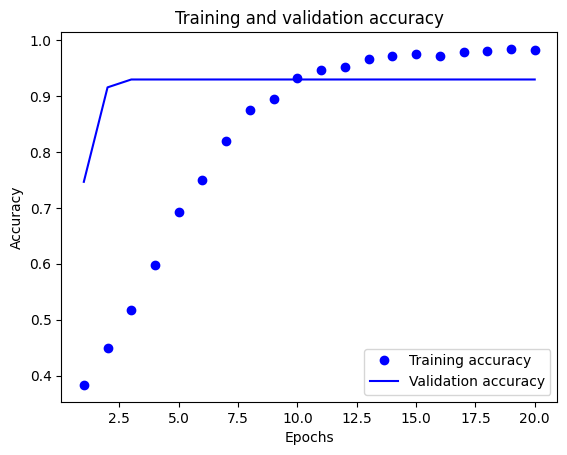

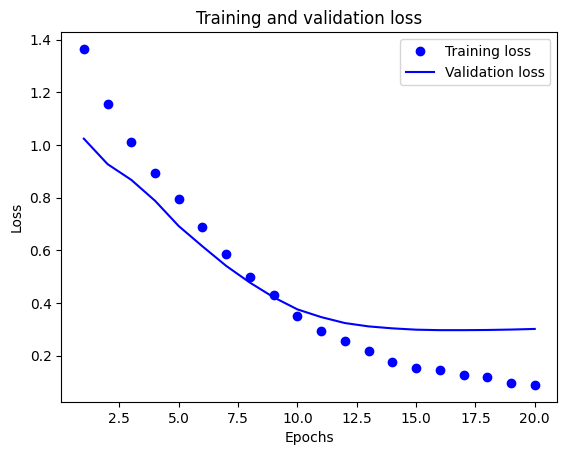

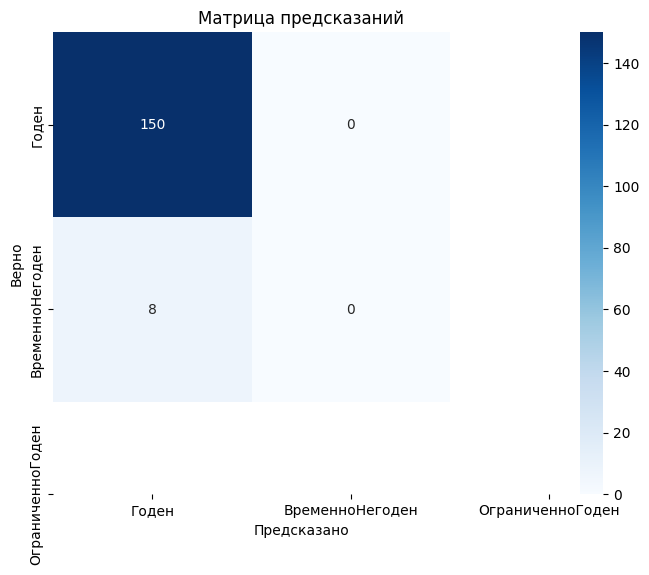

In [ ]:
evaluate_model(model, x_test, y_test)